In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/covid_19_clean_complete.csv')
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [4]:
df = pd.DataFrame(data)
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [7]:
df.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df['Date'].value_counts()

,count
Date,
2020-01-22,261
2020-01-23,261
2020-01-24,261
2020-01-25,261
2020-01-26,261
...,...
2020-07-23,261
2020-07-24,261
2020-07-25,261


In [10]:
print('Minimun Date =',df['Date'].min())
print('Maximum Date =',df['Date'].max())

Minimun Date = 2020-01-22
Maximum Date = 2020-07-27


In [12]:
group_country_list = df.groupby(by = 'Country/Region')[['Date','Confirmed','Deaths','Recovered','Active']].sum()
group_country_list

,Date,Confirmed,Deaths,Recovered,Active
Country/Region,,,,,
Afghanistan,2020-01-222020-01-232020-01-242020-01-252020-0...,1936390,49098,798240,1089052
Albania,2020-01-222020-01-232020-01-242020-01-252020-0...,196702,5708,118877,72117
Algeria,2020-01-222020-01-232020-01-242020-01-252020-0...,1179755,77972,755897,345886
Andorra,2020-01-222020-01-232020-01-242020-01-252020-0...,94404,5423,69074,19907
Angola,2020-01-222020-01-232020-01-242020-01-252020-0...,22662,1078,6573,15011
...,...,...,...,...,...
West Bank and Gaza,2020-01-222020-01-232020-01-242020-01-252020-0...,233461,1370,61124,170967
Western Sahara,2020-01-222020-01-232020-01-242020-01-252020-0...,901,63,648,190
Yemen,2020-01-222020-01-232020-01-242020-01-252020-0...,67180,17707,23779,25694


In [13]:
country_list = df['Country/Region'].unique()
country_list

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

In [14]:
print('Total Country =',df['Country/Region'].nunique())

Total Country = 187


In [15]:
Min_confirmed_case = df.groupby(by = 'Date')['Confirmed'].sum().reset_index()
Min_confirmed_case[Min_confirmed_case['Date'] == '2020-01-22']

,Date,Confirmed
0,2020-01-22,555


In [16]:
Max_confirmed_case = df.groupby(by = 'Date')['Confirmed'].sum().reset_index()
Max_confirmed_case[Max_confirmed_case['Date'] == '2020-07-27']

,Date,Confirmed
187,2020-07-27,16480485


In [17]:
df.groupby(by = 'Date')['Confirmed'].sum().sort_values().tail(1)

,Confirmed
Date,
2020-07-27,16480485


In [18]:
Confirm_case = df.groupby(by = 'Date')['Confirmed'].sum().reset_index()
Confirm_case

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [19]:
date_2020_07_26 = Confirm_case[Confirm_case == '2020-07-26']
print('Total number of cases on the date of 2020-07-26 =',len(date_2020_07_26))

Total number of cases on the date of 2020-07-26 = 188


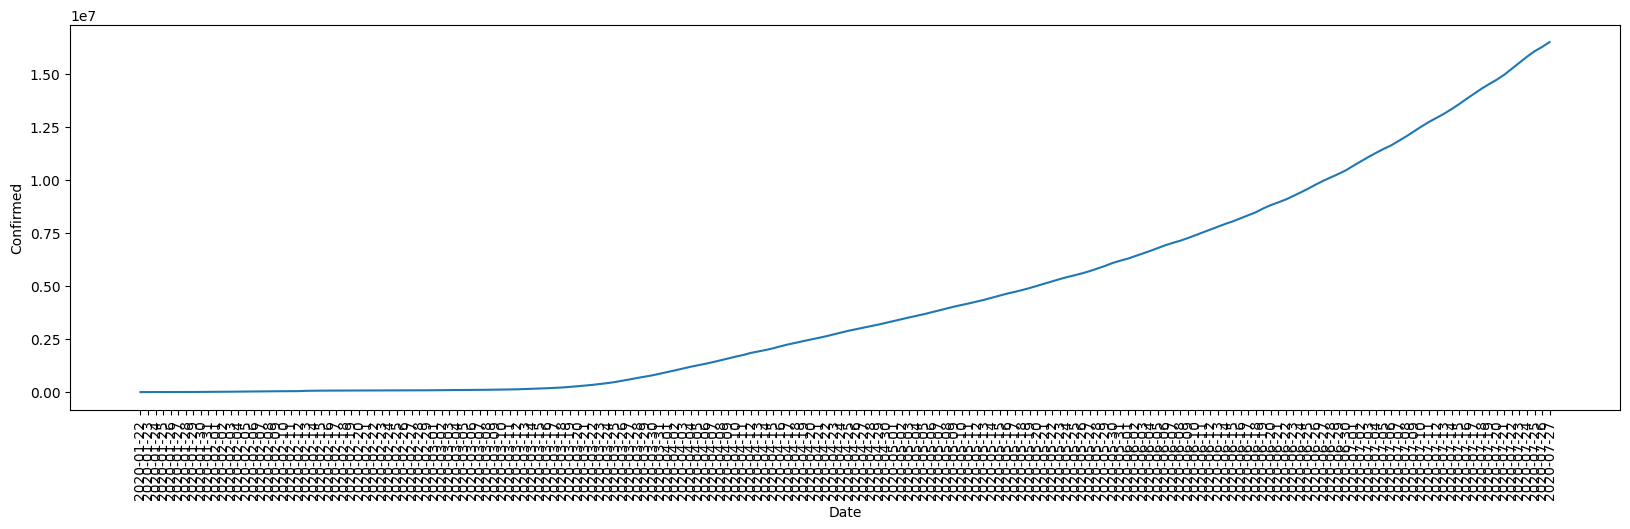

In [25]:
plt.figure(figsize = (20,5))
sns.lineplot(data = Confirm_case, x = 'Date', y = 'Confirmed')
plt.xticks(rotation = 90)
plt.show()

In [26]:
Death_case = df.groupby(by = 'Date')['Deaths'].sum().reset_index()
Death_case

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [27]:
death_2020_07_24 = Death_case[Death_case == '2020-07-24']
print('Total number of cases on the death of 2020-07-26 =',len(death_2020_07_24))

Total number of cases on the death of 2020-07-26 = 188


In [28]:
Confirm_country = df.groupby(by = 'Country/Region')['Confirmed'].sum().sort_values(ascending = False).reset_index()
Confirm_country.head(10)

,Country/Region,Confirmed
0,US,224345948
1,Brazil,89524967
2,Russia,45408411
3,India,40883464
4,Spain,27404045
5,United Kingdom,26748587
6,Italy,26745145
7,France,21210926
8,Germany,21059152
9,Iran,19339267


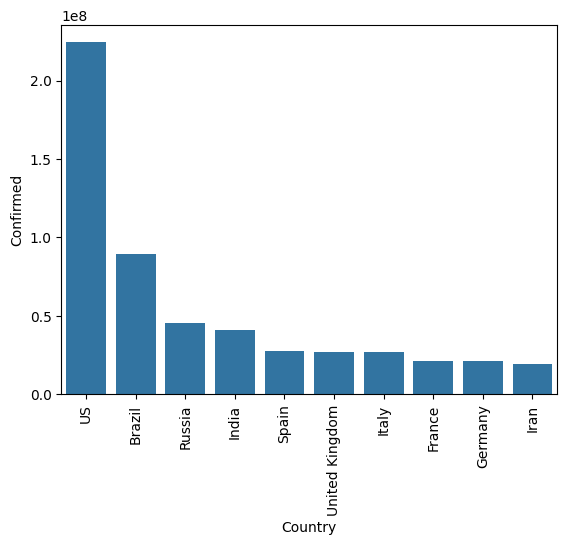

In [30]:
sns.barplot(data = Confirm_country.head(10), x = 'Country/Region', y = 'Confirmed' )
plt.xlabel('Country')
plt.ylabel('Confirmed')
plt.xticks(rotation = 90)
plt.show()

In [31]:
Death_country = df.groupby(by = 'Country/Region')['Confirmed'].sum().sort_values(ascending = False).reset_index()
Death_country.head(10)

,Country/Region,Confirmed
0,US,224345948
1,Brazil,89524967
2,Russia,45408411
3,India,40883464
4,Spain,27404045
5,United Kingdom,26748587
6,Italy,26745145
7,France,21210926
8,Germany,21059152
9,Iran,19339267


In [32]:
Recovered_country = df.groupby(by = 'Country/Region')['Recovered'].sum().sort_values(ascending = False).reset_index()
Recovered_country.head(10)

,Country/Region,Recovered
0,US,56353416
1,Brazil,54492873
2,Russia,25120448
3,India,23783720
4,Germany,17107839
5,Italy,15673910
6,Iran,15200895
7,Spain,15093583
8,Turkey,13345389
9,Chile,13292593


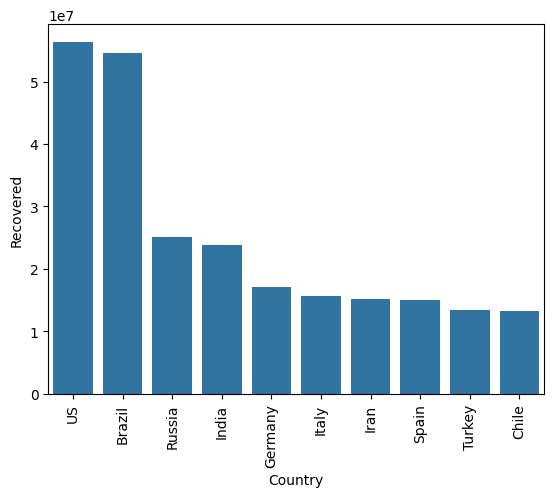

In [33]:
sns.barplot(data = Recovered_country.head(10), x = 'Country/Region', y = 'Recovered')
plt.xlabel('Country')
plt.ylabel('Recovered')
plt.xticks(rotation = 90)
plt.show()

In [34]:
Active_country = df.groupby(by = 'Country/Region')["Active"].sum().sort_values(ascending = False).reset_index()
Active_country.head(10)

,Country/Region,Active
0,US,156981121
1,Brazil,31094060
2,United Kingdom,22624595
3,Russia,19668578
4,India,15987913
5,France,10980287
6,Spain,9277432
7,Canada,8656985
8,Peru,7748957
9,Italy,7363518


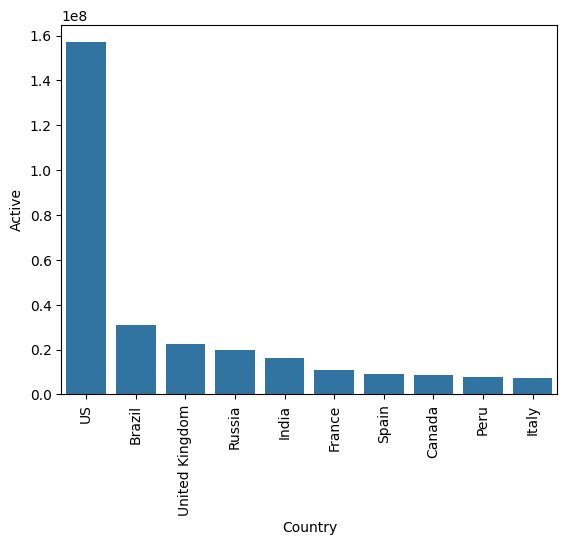

In [35]:
sns.barplot(data = Active_country.head(10), x = 'Country/Region', y = 'Active')
plt.xlabel('Country')
plt.ylabel('Active')
plt.xticks(rotation = 90)
plt.show()

In [36]:
Russia = df[df['Country/Region']=='Russia']
Russia

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
185,NaN,Russia,61.52401,105.318756,2020-01-22,0,0,0,0,Europe
446,NaN,Russia,61.52401,105.318756,2020-01-23,0,0,0,0,Europe
707,NaN,Russia,61.52401,105.318756,2020-01-24,0,0,0,0,Europe
968,NaN,Russia,61.52401,105.318756,2020-01-25,0,0,0,0,Europe
1229,NaN,Russia,61.52401,105.318756,2020-01-26,0,0,0,0,Europe
...,...,...,...,...,...,...,...,...,...,...
47948,NaN,Russia,61.52401,105.318756,2020-07-23,793720,12873,579295,201552,Europe
48209,NaN,Russia,61.52401,105.318756,2020-07-24,799499,13026,587728,198745,Europe
48470,NaN,Russia,61.52401,105.318756,2020-07-25,805332,13172,596064,196096,Europe
48731,NaN,Russia,61.52401,105.318756,2020-07-26,811073,13249,599172,198652,Europe


In [37]:
Russia = Russia.groupby(by = "Date")[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
Russia

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,793720,12873,579295,201552
184,2020-07-24,799499,13026,587728,198745
185,2020-07-25,805332,13172,596064,196096
186,2020-07-26,811073,13249,599172,198652


In [38]:
Us = df[df['Country/Region'] == 'US']
Us

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
223,NaN,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas
484,NaN,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas
745,NaN,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas
1006,NaN,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas
1267,NaN,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas
...,...,...,...,...,...,...,...,...,...,...
47986,NaN,US,40.0,-100.0,2020-07-23,4038816,144430,1233269,2661117,Americas
48247,NaN,US,40.0,-100.0,2020-07-24,4112531,145560,1261624,2705347,Americas
48508,NaN,US,40.0,-100.0,2020-07-25,4178970,146465,1279414,2753091,Americas
48769,NaN,US,40.0,-100.0,2020-07-26,4233923,146935,1297863,2789125,Americas


In [39]:
Us = Us.groupby(by = 'Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
Us

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,1,0,0,1
1,2020-01-23,1,0,0,1
2,2020-01-24,2,0,0,2
3,2020-01-25,2,0,0,2
4,2020-01-26,5,0,0,5
...,...,...,...,...,...
183,2020-07-23,4038816,144430,1233269,2661117
184,2020-07-24,4112531,145560,1261624,2705347
185,2020-07-25,4178970,146465,1279414,2753091
186,2020-07-26,4233923,146935,1297863,2789125


In [40]:
Brazil =  df[df['Country/Region'] == 'Brazil']
Brazil

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
28,NaN,Brazil,-14.235,-51.9253,2020-01-22,0,0,0,0,Americas
289,NaN,Brazil,-14.235,-51.9253,2020-01-23,0,0,0,0,Americas
550,NaN,Brazil,-14.235,-51.9253,2020-01-24,0,0,0,0,Americas
811,NaN,Brazil,-14.235,-51.9253,2020-01-25,0,0,0,0,Americas
1072,NaN,Brazil,-14.235,-51.9253,2020-01-26,0,0,0,0,Americas
...,...,...,...,...,...,...,...,...,...,...
47791,NaN,Brazil,-14.235,-51.9253,2020-07-23,2287475,84082,1620313,583080,Americas
48052,NaN,Brazil,-14.235,-51.9253,2020-07-24,2343366,85238,1693214,564914,Americas
48313,NaN,Brazil,-14.235,-51.9253,2020-07-25,2394513,86449,1785359,522705,Americas
48574,NaN,Brazil,-14.235,-51.9253,2020-07-26,2419091,87004,1812913,519174,Americas


In [41]:
Brazil = Brazil.groupby(by = 'Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
Brazil

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,2287475,84082,1620313,583080
184,2020-07-24,2343366,85238,1693214,564914
185,2020-07-25,2394513,86449,1785359,522705
186,2020-07-26,2419091,87004,1812913,519174


In [42]:
India = df[df['Country/Region'] == 'India']
India

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,NaN,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
390,NaN,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
651,NaN,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
912,NaN,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
1173,NaN,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia
...,...,...,...,...,...,...,...,...,...,...
47892,NaN,India,20.593684,78.96288,2020-07-23,1288108,30601,817209,440298,South-East Asia
48153,NaN,India,20.593684,78.96288,2020-07-24,1337024,31358,849432,456234,South-East Asia
48414,NaN,India,20.593684,78.96288,2020-07-25,1385635,32060,885573,468002,South-East Asia
48675,NaN,India,20.593684,78.96288,2020-07-26,1435616,32771,917568,485277,South-East Asia


In [43]:
India = India.groupby(by = 'Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
India

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1288108,30601,817209,440298
184,2020-07-24,1337024,31358,849432,456234
185,2020-07-25,1385635,32060,885573,468002
186,2020-07-26,1435616,32771,917568,485277


In [44]:
United_Kingdom = df[df['Country/Region'] == 'United Kingdom']
United_Kingdom

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
215,Bermuda,United Kingdom,32.3078,-64.7505,2020-01-22,0,0,0,0,Europe
216,Cayman Islands,United Kingdom,19.3133,-81.2546,2020-01-22,0,0,0,0,Europe
217,Channel Islands,United Kingdom,49.3723,-2.3644,2020-01-22,0,0,0,0,Europe
218,Gibraltar,United Kingdom,36.1408,-5.3536,2020-01-22,0,0,0,0,Europe
219,Isle of Man,United Kingdom,54.2361,-4.5481,2020-01-22,0,0,0,0,Europe
...,...,...,...,...,...,...,...,...,...,...
49028,NaN,United Kingdom,55.3781,-3.4360,2020-07-27,300111,45759,0,254352,Europe
49052,Anguilla,United Kingdom,18.2206,-63.0686,2020-07-27,3,0,3,0,Europe
49053,British Virgin Islands,United Kingdom,18.4207,-64.6400,2020-07-27,8,1,7,0,Europe
49054,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,2020-07-27,99,2,36,61,Europe


In [45]:
United_Kingdom = United_Kingdom.groupby(by = 'Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
United_Kingdom

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,298731,45639,1425,251667
184,2020-07-24,299500,45762,1425,252313
185,2020-07-25,300270,45823,1427,253020
186,2020-07-26,301020,45837,1434,253749


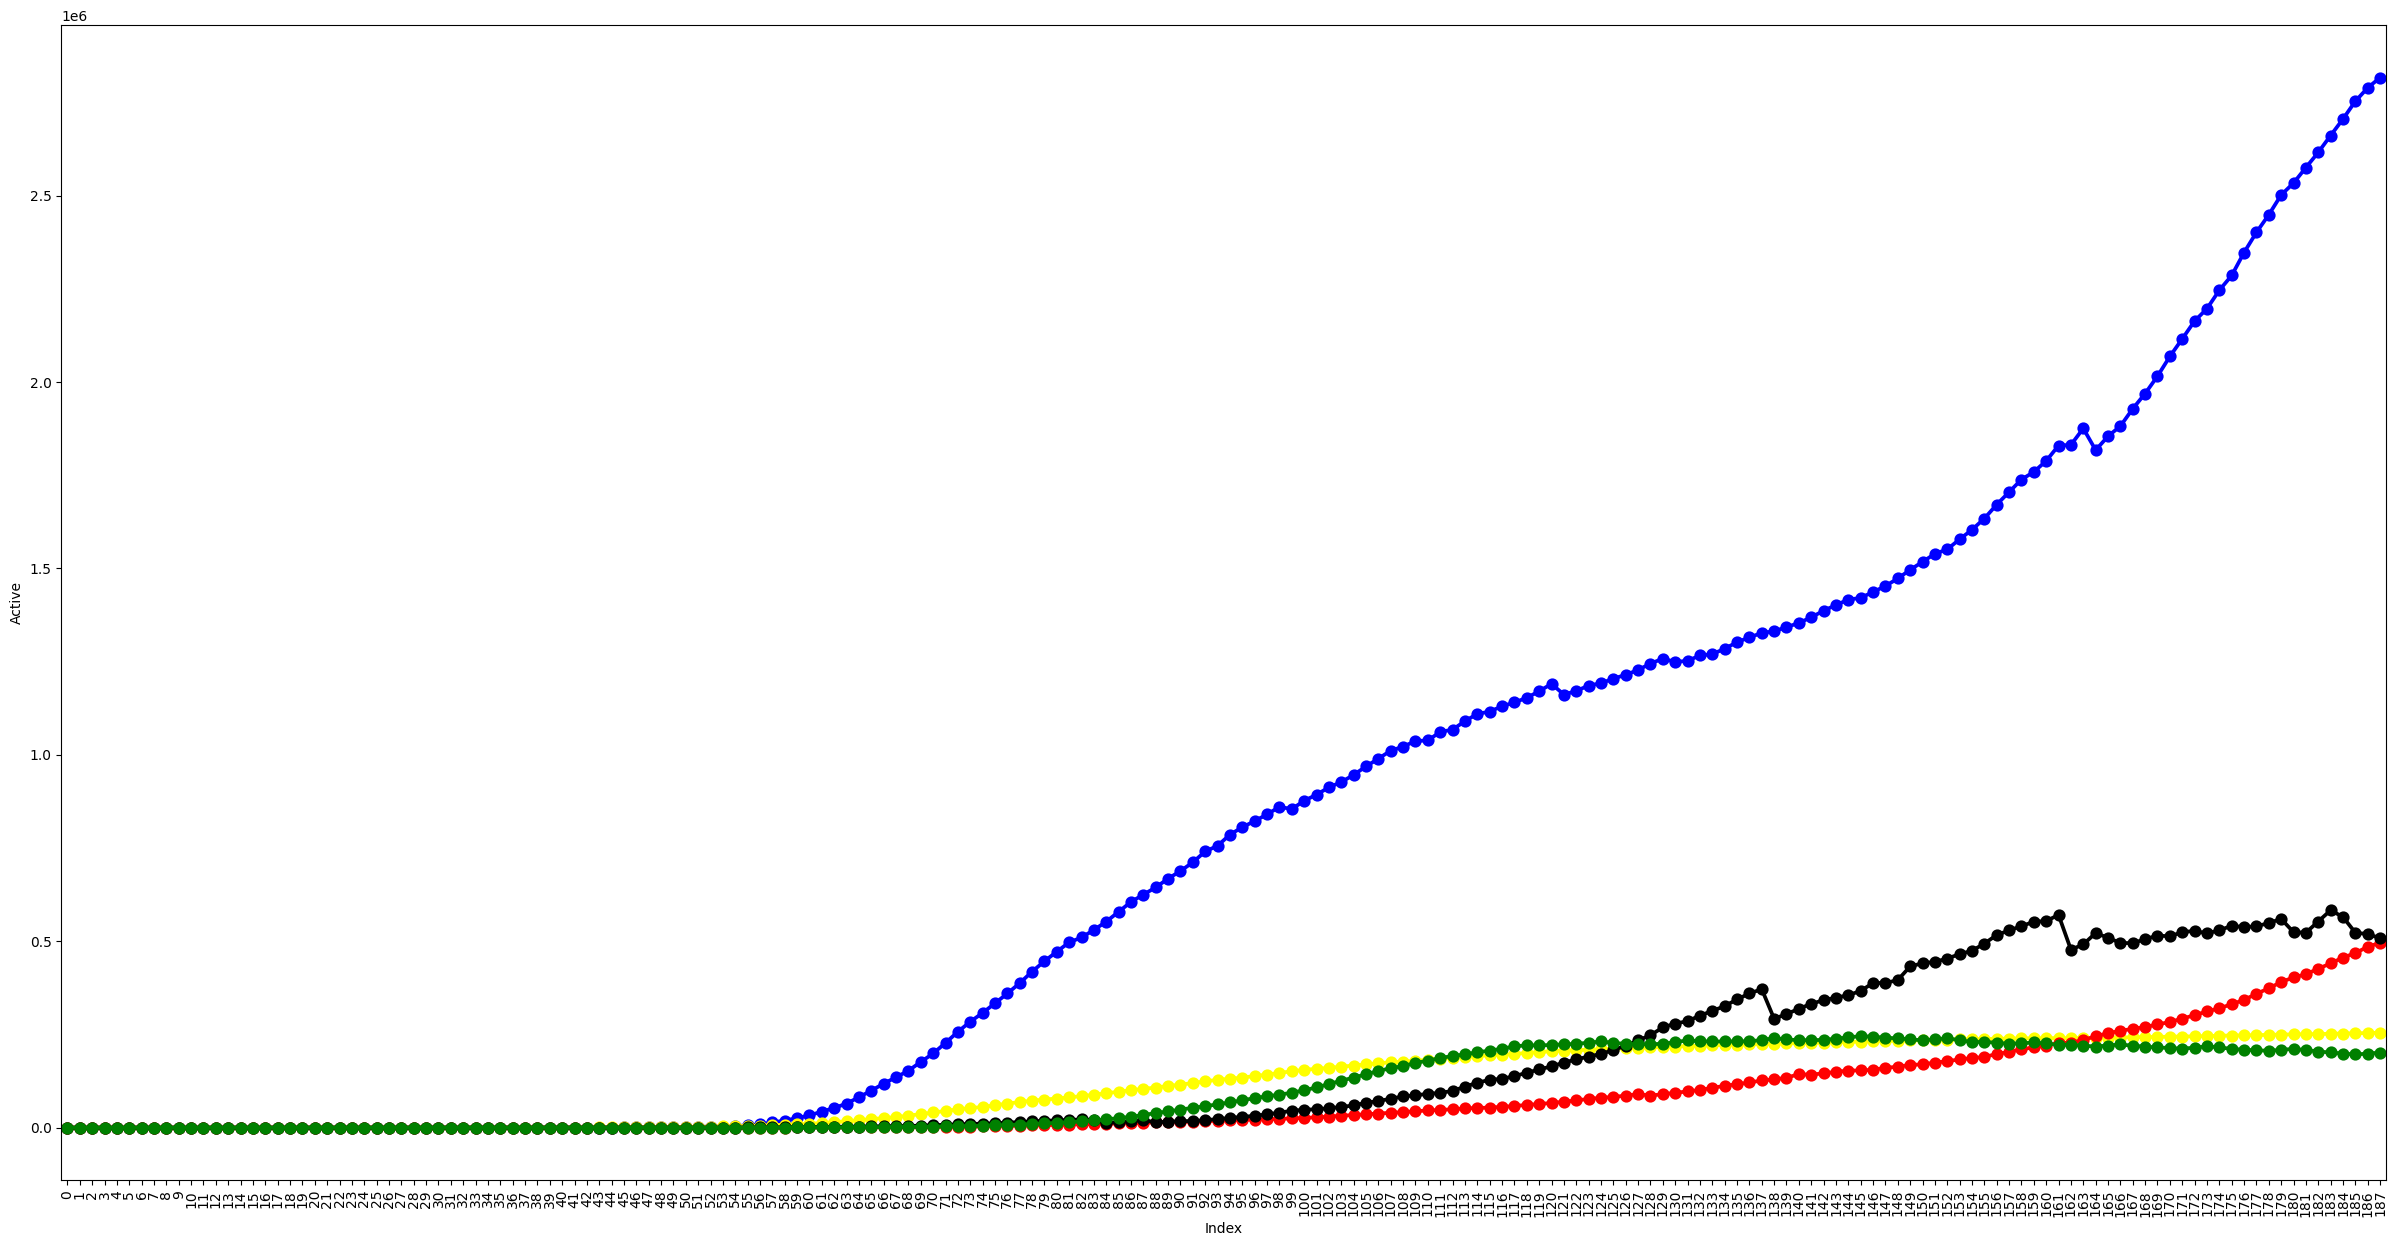

In [63]:
plt.figure(figsize = (30,15))
sns.pointplot(x = Us.index , y = Us.Active, color = 'blue' )
sns.pointplot(x = United_Kingdom.index, y = United_Kingdom.Active, color = 'yellow')
sns.pointplot(x = India.index, y = India.Active, color = 'red')
sns.pointplot(x = Brazil.index, y = Brazil.Active, color = 'black')
sns.pointplot(x = Russia.index, y = Russia.Active, color = 'green')
plt.xlabel('Index')
plt.xticks(rotation = 90)
plt.show()

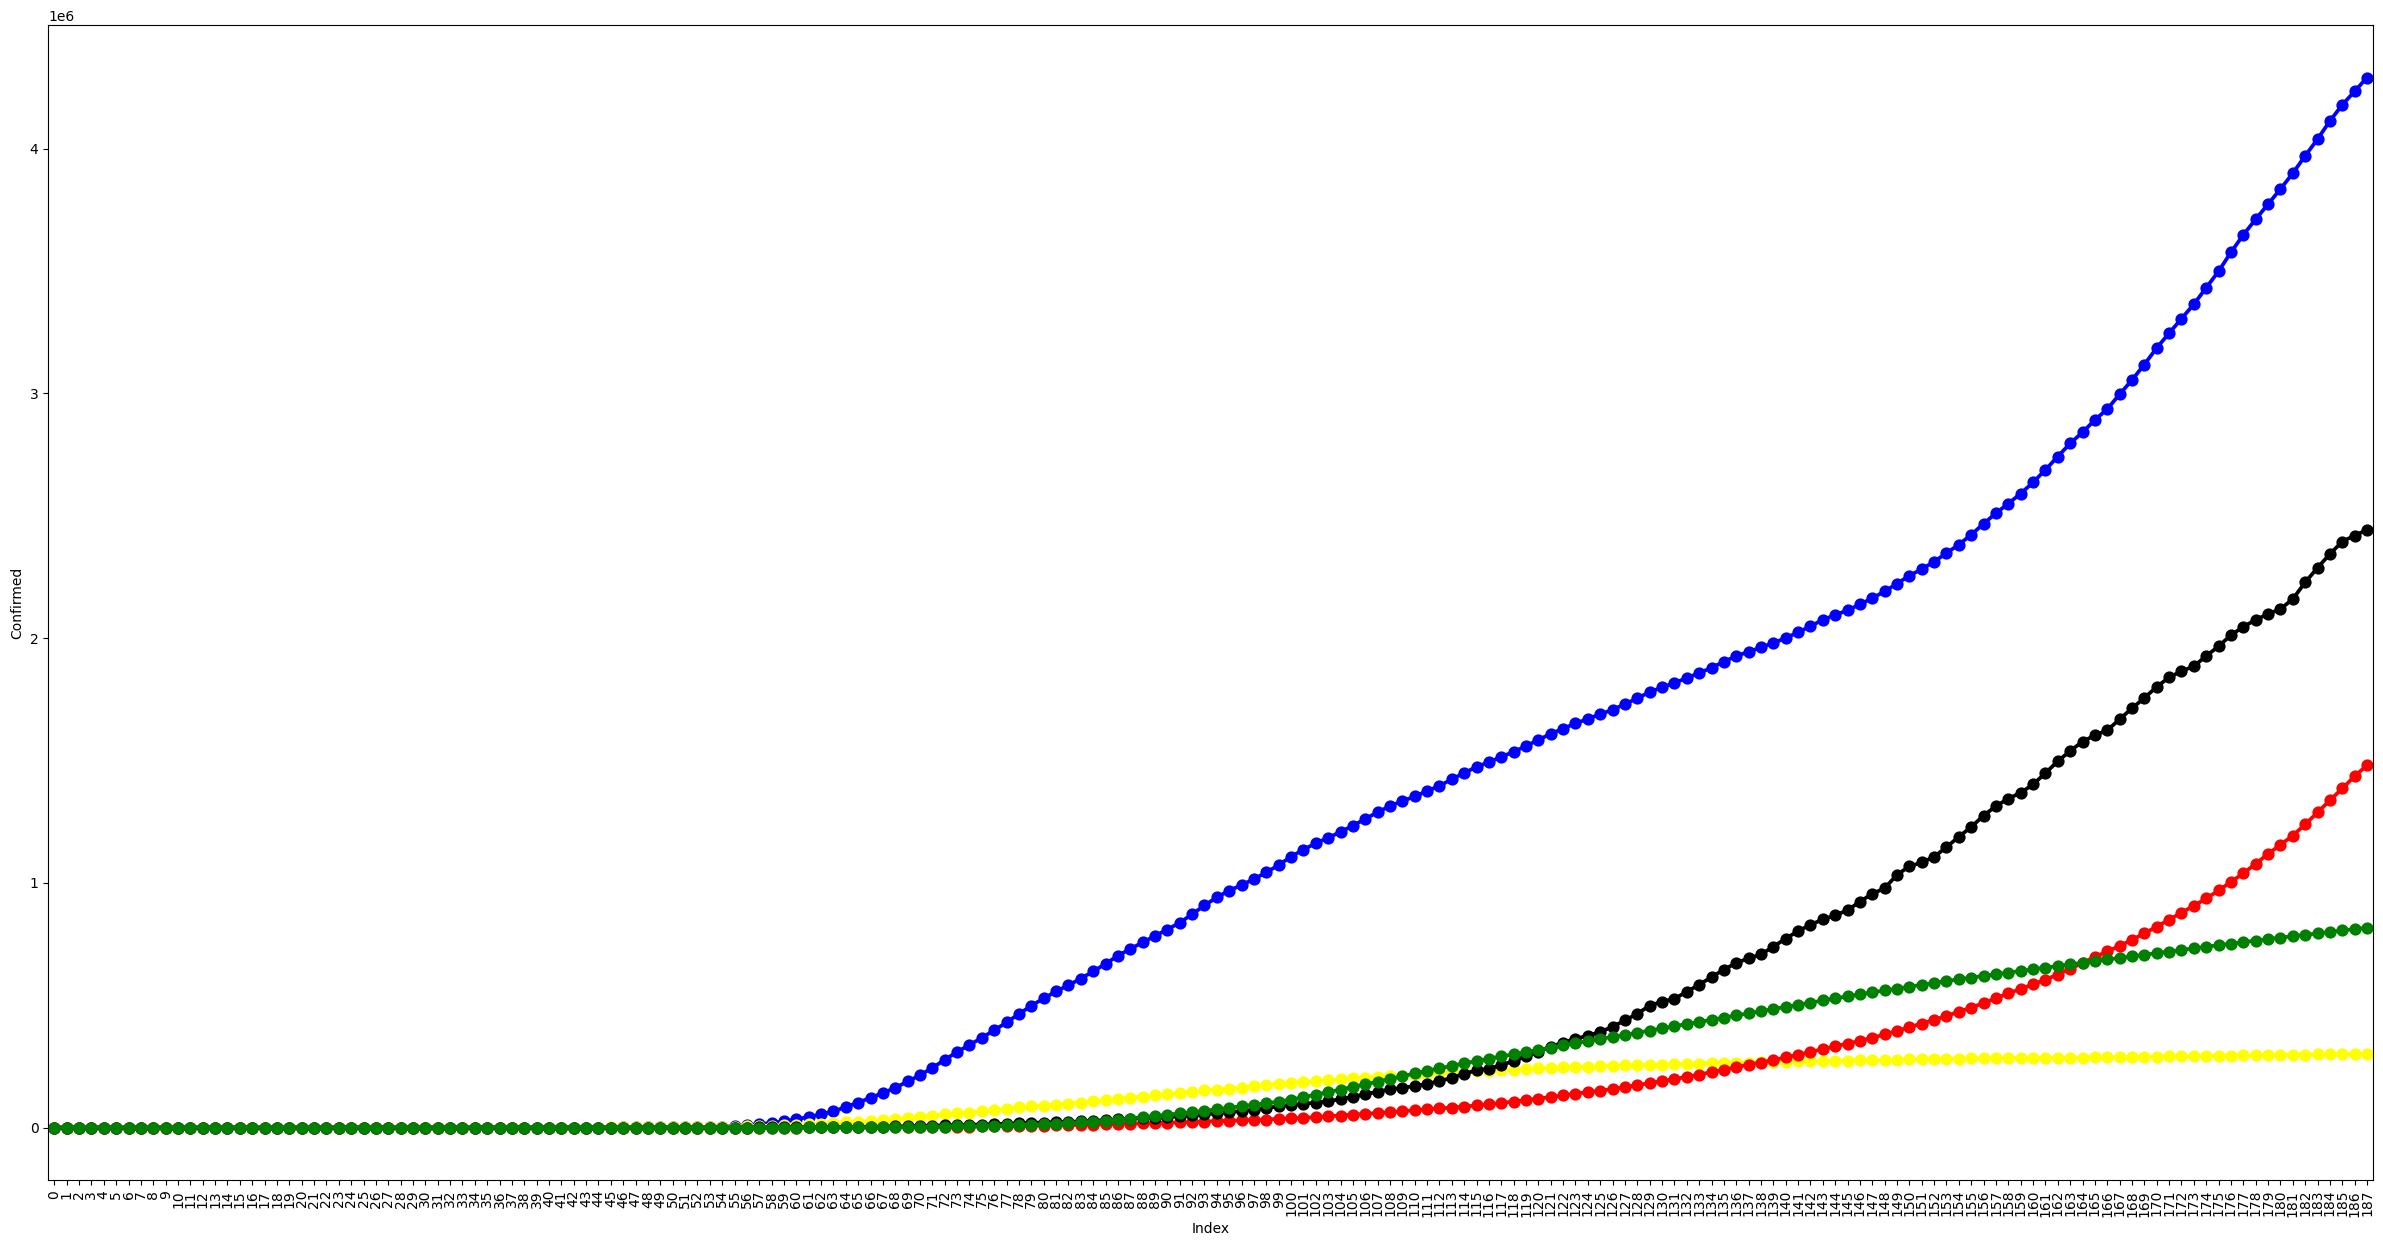

In [64]:
plt.figure(figsize = (30,15))
sns.pointplot(x = Us.index , y = Us.Confirmed, color = 'blue' )
sns.pointplot(x = United_Kingdom.index, y = United_Kingdom.Confirmed, color = 'yellow')
sns.pointplot(x = India.index, y = India.Confirmed, color = 'red')
sns.pointplot(x = Brazil.index, y = Brazil.Confirmed, color = 'black')
sns.pointplot(x = Russia.index, y = Russia.Confirmed, color = 'green')
plt.xlabel('Index')
plt.xticks(rotation = 90)
plt.show()

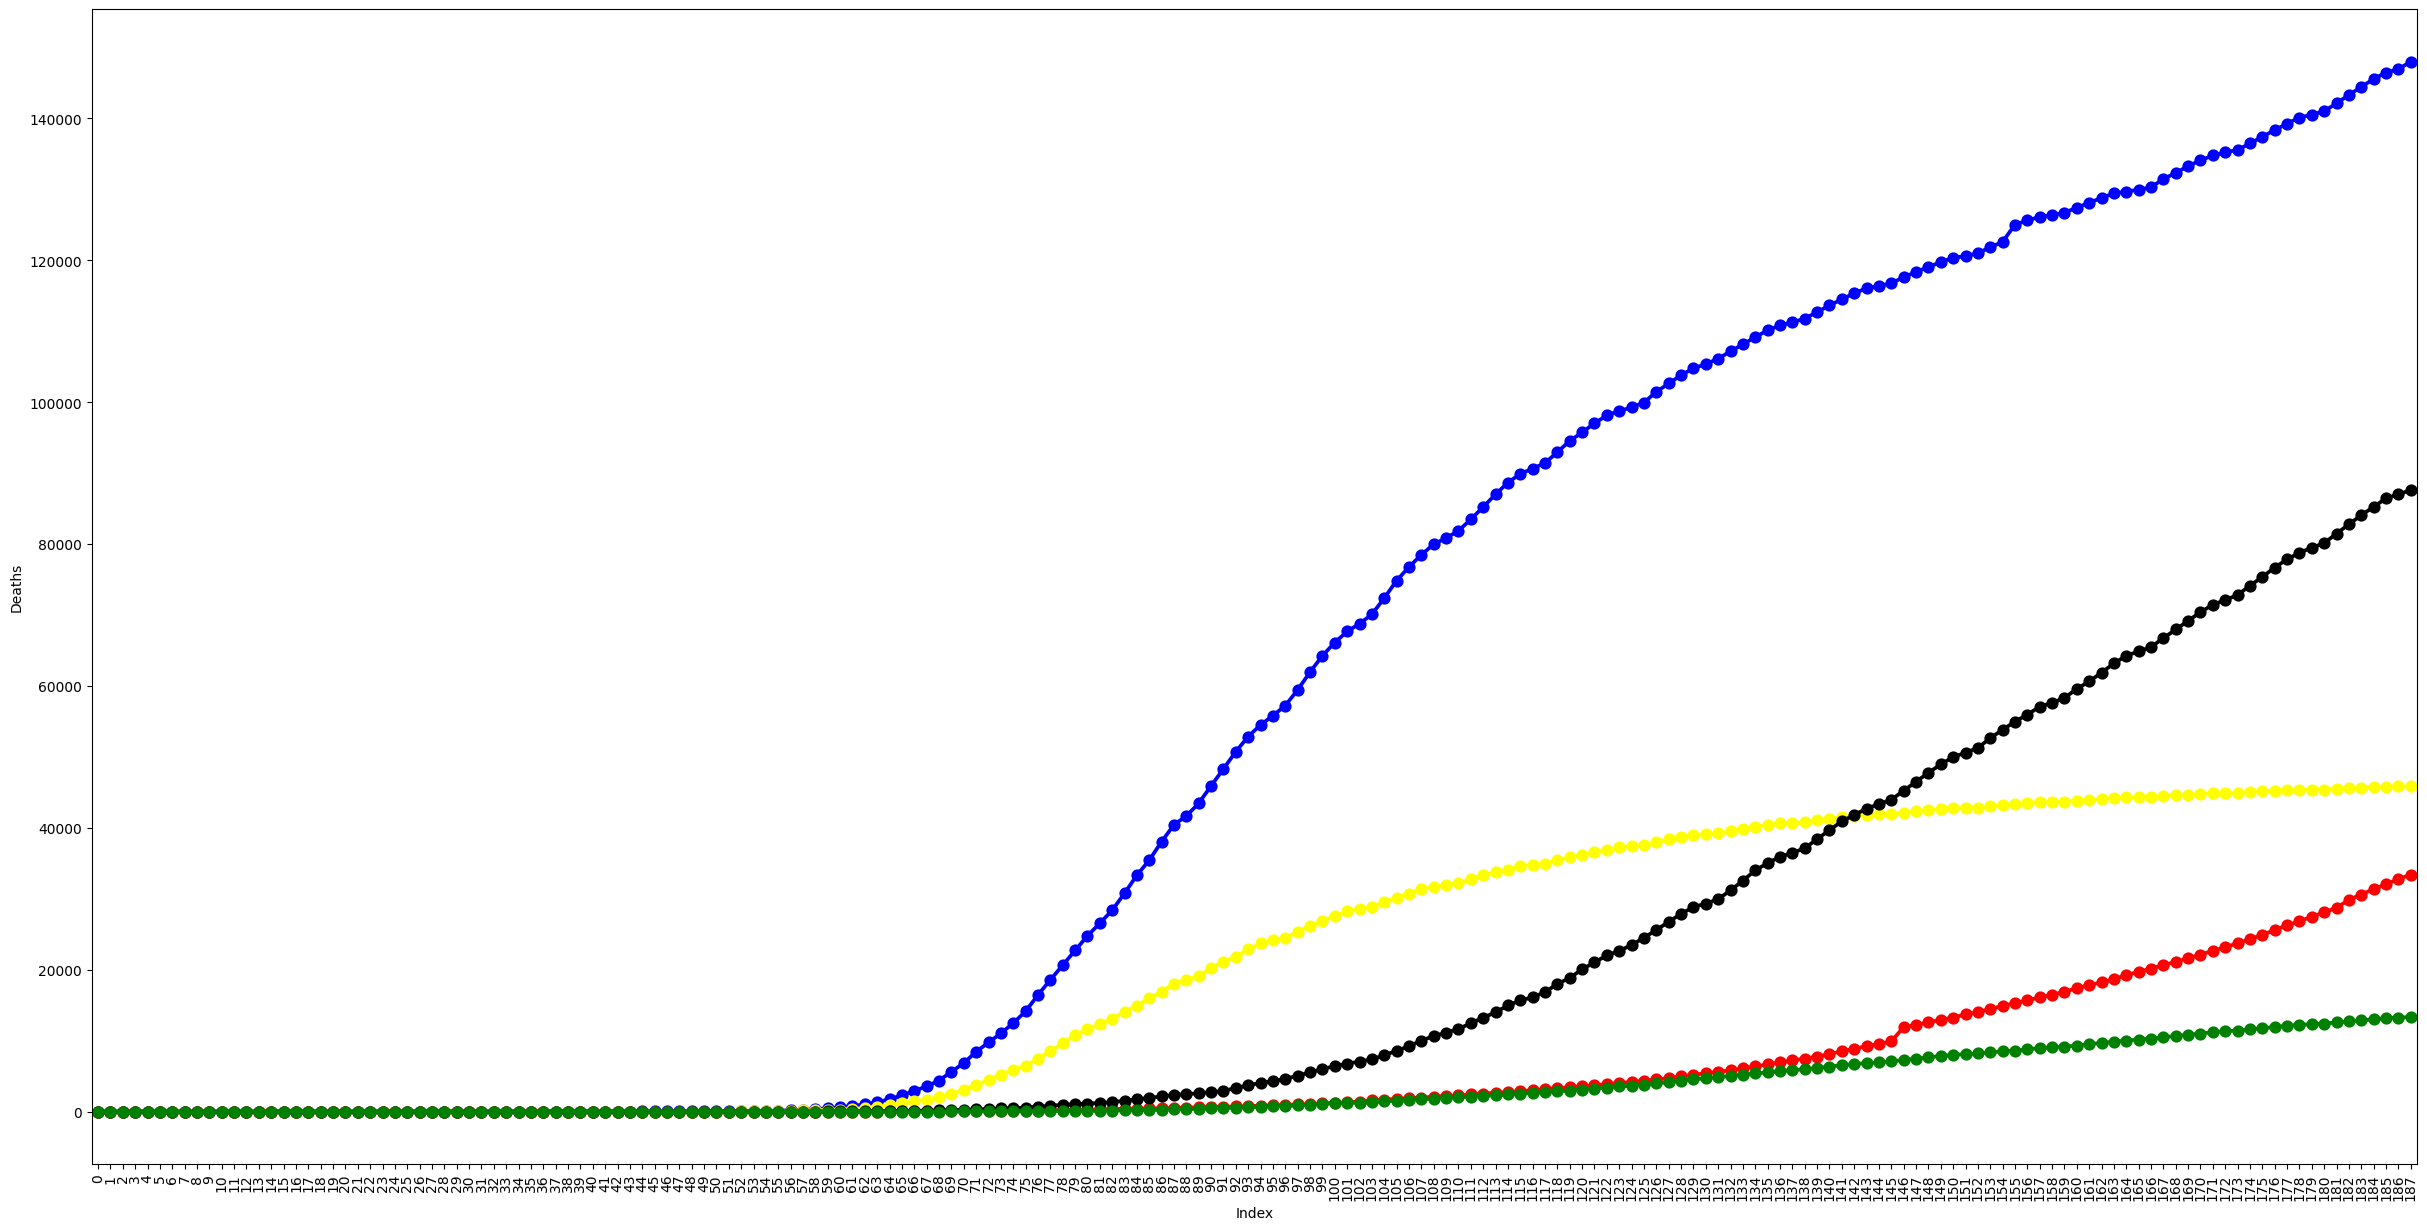

In [65]:
plt.figure(figsize = (30,15))
sns.pointplot(x = Us.index , y = Us.Deaths, color = 'blue' )
sns.pointplot(x = United_Kingdom.index, y = United_Kingdom.Deaths, color = 'yellow')
sns.pointplot(x = India.index, y = India.Deaths, color = 'red')
sns.pointplot(x = Brazil.index, y = Brazil.Deaths, color = 'black')
sns.pointplot(x = Russia.index, y = Russia.Deaths, color = 'green')
plt.xlabel('Index')
plt.xticks(rotation = 90)
plt.show()

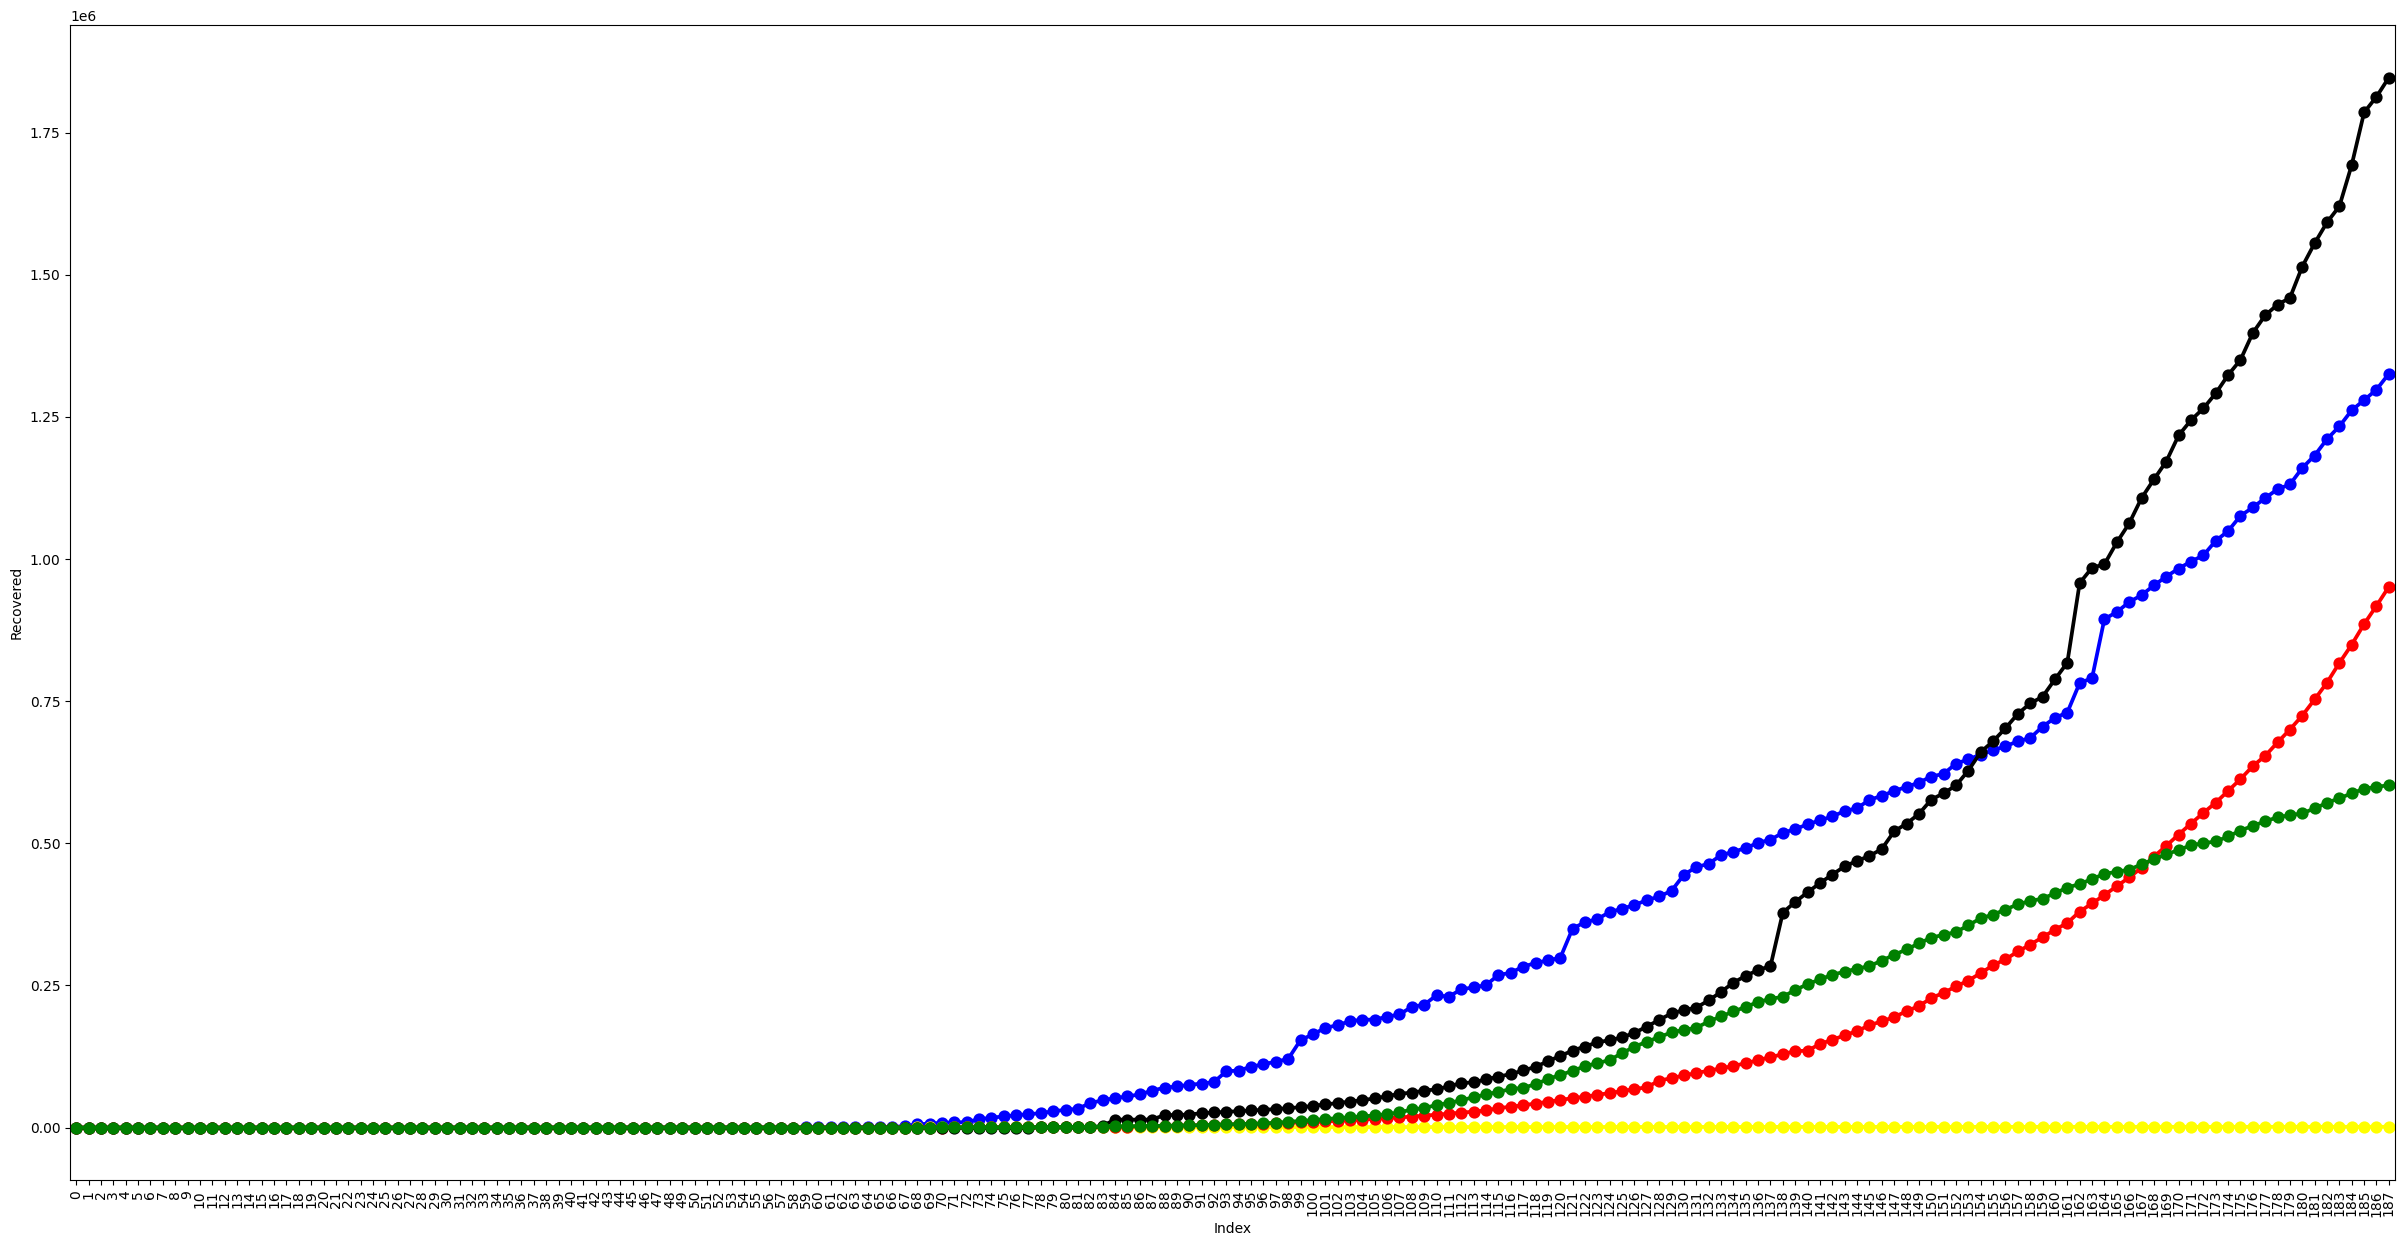

In [66]:
plt.figure(figsize = (30,15))
sns.pointplot(x = Us.index , y = Us.Recovered, color = 'blue' )
sns.pointplot(x = United_Kingdom.index, y = United_Kingdom.Recovered, color = 'yellow')
sns.pointplot(x = India.index, y = India.Recovered, color = 'red')
sns.pointplot(x = Brazil.index, y = Brazil.Recovered, color = 'black')
sns.pointplot(x = Russia.index, y = Russia.Recovered, color = 'green')
plt.xlabel('Index')
plt.xticks(rotation = 90)
plt.show()

In [51]:
Active_country = df.groupby(by = 'Country/Region')["Active"].sum().sort_values(ascending = False).reset_index()
Active_country.head()

,Country/Region,Active
0,US,156981121
1,Brazil,31094060
2,United Kingdom,22624595
3,Russia,19668578
4,India,15987913


In [52]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].astype

<bound method NDFrame.astype of 0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
49063   2020-07-27
49064   2020-07-27
49065   2020-07-27
49066   2020-07-27
49067   2020-07-27
Name: Date, Length: 49068, dtype: datetime64[ns]>

In [53]:
Confirmed_date = df.groupby(by = 'Date')['Confirmed'].sum().reset_index()
Confirmed_date

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [54]:
Confirmed_date.columns=['ds','y']
Confirmed_date

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [55]:
#!pip install prophet

In [56]:
from prophet import Prophet

In [57]:
model = Prophet()

In [58]:
model.fit(Confirmed_date)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpykmqxrue/56rrsfrh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpykmqxrue/nz1bfkrc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27490', 'data', 'file=/tmp/tmpykmqxrue/56rrsfrh.json', 'init=/tmp/tmpykmqxrue/nz1bfkrc.json', 'output', 'file=/tmp/tmpykmqxrue/prophet_modelwqzzfwl0/prophet_model-20250514090512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:05:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:05:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [59]:
future = model.make_future_dataframe(15,freq='D',include_history=True)
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
198,2020-08-07
199,2020-08-08
200,2020-08-09
201,2020-08-10


In [60]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.230158e+05,8.182947e+04,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.140070e+05,8.808552e+04,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-9.820780e+04,1.125455e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-9.973408e+04,1.137771e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-9.572523e+04,1.108884e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2020-08-07,1.837695e+07,1.823968e+07,1.855122e+07,1.828997e+07,1.847058e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.838703e+07
199,2020-08-08,1.858094e+07,1.843231e+07,1.874630e+07,1.848251e+07,1.869059e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.859469e+07
200,2020-08-09,1.878493e+07,1.863504e+07,1.896299e+07,1.866924e+07,1.891244e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.879223e+07
201,2020-08-10,1.898892e+07,1.881220e+07,1.916065e+07,1.885824e+07,1.913011e+07,-2102.756726,-2102.756726,-2102.756726,-2102.756726,-2102.756726,-2102.756726,0.0,0.0,0.0,1.898682e+07


In [61]:
forecast[['ds','yhat','yhat_upper','yhat_lower']]

,ds,yhat,yhat_upper,yhat_lower
0,2020-01-22,-2.067684e+04,8.182947e+04,-1.230158e+05
1,2020-01-23,-8.050948e+03,8.808552e+04,-1.140070e+05
2,2020-01-24,5.827455e+03,1.125455e+05,-9.820780e+04
3,2020-01-25,1.217668e+04,1.137771e+05,-9.973408e+04
4,2020-01-26,8.405020e+03,1.108884e+05,-9.572523e+04
...,...,...,...,...
198,2020-08-07,1.838703e+07,1.855122e+07,1.823968e+07
199,2020-08-08,1.859469e+07,1.874630e+07,1.843231e+07
200,2020-08-09,1.879223e+07,1.896299e+07,1.863504e+07
201,2020-08-10,1.898682e+07,1.916065e+07,1.881220e+07


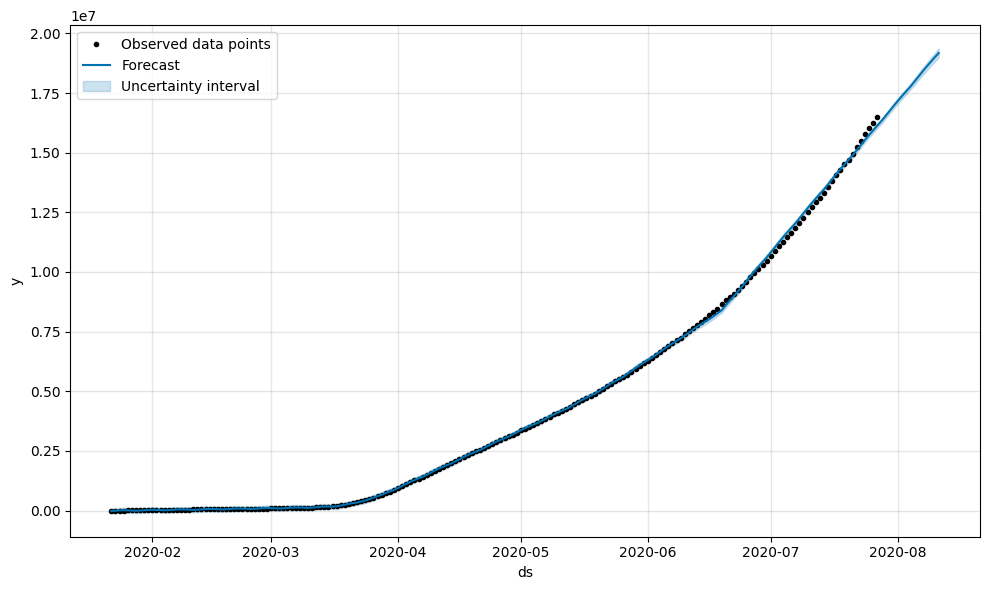

In [62]:
model.plot(forecast,include_legend=True)
plt.show()